Reference: https://scikit-learn.org/stable/modules/generated/sklearn.covariance.GraphicalLasso.html

# GraphicalLassoCV Example

In [1]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

In [2]:
# Define true covariance matrix
true_cov = np.array([[0.8, 0.0, 0.2, 0.0],
                     [0.0, 0.4, 0.0, 0.0],
                     [0.2, 0.0, 0.3, 0.1],
                     [0.0, 0.0, 0.1, 0.7]])

# Set seed and generate X from multivaraite norm with specified covariance
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=true_cov, size=200)

In [3]:
# True precision matrix calculated from the inverse of true covariance matrix
true_prec = np.linalg.inv(true_cov)
true_prec

array([[ 1.51515152,  0.        , -1.06060606,  0.15151515],
       [ 0.        ,  2.5       ,  0.        ,  0.        ],
       [-1.06060606,  0.        ,  4.24242424, -0.60606061],
       [ 0.15151515,  0.        , -0.60606061,  1.51515152]])

In [4]:
# Fit the GraphicalLassoCV model
est = GraphicalLassoCV(max_iter = 1000).fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [5]:
# The estimated precision matrix from GraphicalLassoCV
np.around(est.precision_, decimals=3)

array([[ 1.471, -0.124, -0.953,  0.051],
       [-0.124,  2.764, -0.   , -0.086],
       [-0.953, -0.   ,  3.82 , -0.407],
       [ 0.051, -0.086, -0.407,  1.497]])

In [6]:
# The estimated covariance matrix from GraphicalLassoCV
np.around(est.covariance_, decimals=3)

array([[0.816, 0.038, 0.207, 0.03 ],
       [0.038, 0.364, 0.012, 0.023],
       [0.207, 0.012, 0.322, 0.081],
       [0.03 , 0.023, 0.081, 0.69 ]])

In [7]:
# The list of lambdas used in cross validation
est.cv_alphas_

[0.22813020648178522,
 0.049149163068849436,
 0.038445849385428485,
 0.030073418196287775,
 0.026598029308124188,
 0.024708675181834977,
 0.02352426845722381,
 0.022953528705788324,
 0.021323056625665728,
 0.01980840286864867,
 0.01840134044076988,
 0.014394042927746526,
 0.010588866190156311,
 0.007789617396298063,
 0.00421550355833272,
 0.0022813020648178514,
 0]

In [8]:
# The lambda chosen by cross validation
est.alpha_

0.021323056625665728

In [9]:
# The index of the chosen lambda in the list of lambdas
ind_lambda = np.where(est.cv_alphas_ == est.alpha_)[0][0]
ind_lambda

8

In [10]:
#grid_scores_ndarray of shape (n_alphas, n_folds): Log-likelihood score on left-out data across folds.
grid_score= pd.DataFrame(np.round(est.grid_scores_, 3))

In [11]:
grid_score

,0,1,2
0,-4.366,-4.427,-4.107
1,-4.210,-4.345,-4.049
2,-4.195,-4.344,-4.054
3,-4.185,-4.342,-4.060
4,-4.181,-4.341,-4.063
5,-4.178,-4.341,-4.065
6,-4.177,-4.341,-4.067
7,-4.176,-4.341,-4.067
8,-4.175,-4.341,-4.069
9,-4.173,-4.341,-4.071


In [12]:
# Summary information 
alphas = pd.DataFrame(np.array(est.cv_alphas_).reshape(len(est.cv_alphas_),1))

In [13]:
alphas.shape

(17, 1)

In [14]:
alphas

,0
0,0.228130
1,0.049149
2,0.038446
3,0.030073
4,0.026598
5,0.024709
6,0.023524
7,0.022954
8,0.021323
9,0.019808


In [15]:
grid_score.shape

(17, 3)

In [16]:
df_temp = pd.concat((alphas,grid_score),axis=1)

In [17]:
df_temp.columns = ['lambdas','score_fold1','score_fold2','score_fold3']

In [18]:
df_temp['Total_score'] = est.grid_scores_.sum(axis = 1)
df_temp['Average_score'] = est.grid_scores_.sum(axis = 1)/est.grid_scores_.shape[1]
df_temp

,lambdas,score_fold1,score_fold2,score_fold3,Total_score,Average_score
0,0.228130,-4.366,-4.427,-4.107,-12.900396,-4.300132
1,0.049149,-4.210,-4.345,-4.049,-12.604350,-4.201450
2,0.038446,-4.195,-4.344,-4.054,-12.593582,-4.197861
3,0.030073,-4.185,-4.342,-4.060,-12.587278,-4.195759
4,0.026598,-4.181,-4.341,-4.063,-12.585455,-4.195152
5,0.024709,-4.178,-4.341,-4.065,-12.584829,-4.194943
6,0.023524,-4.177,-4.341,-4.067,-12.584572,-4.194857
7,0.022954,-4.176,-4.341,-4.067,-12.584486,-4.194829
8,0.021323,-4.175,-4.341,-4.069,-12.584379,-4.194793
9,0.019808,-4.173,-4.341,-4.071,-12.584466,-4.194822


In [19]:
# Find the precision matrix and number of zero entries in the matrix for each lambda
prec_mx_list = []
num_zeros_list = []

for i in range(len(est.cv_alphas_)):
    est_lambda = GraphicalLasso(alpha = est.cv_alphas_[i], max_iter = 1000).fit(X)
    prec_mx_list.append(est_lambda.precision_)
    
    non_zero = (np.abs(est_lambda.precision_) > 0.02)
    num_zeros = non_zero.shape[0] * non_zero.shape[1] - np.sum(non_zero*1)
    num_zeros_list.append(num_zeros)
    
    print('For lambda = ', est.cv_alphas_[i])
    print('Number of zero entries in the precision matrix is : ', num_zeros)

For lambda =  0.22813020648178522
Number of zero entries in the precision matrix is :  12
For lambda =  0.049149163068849436
Number of zero entries in the precision matrix is :  6
For lambda =  0.038445849385428485
Number of zero entries in the precision matrix is :  6
For lambda =  0.030073418196287775
Number of zero entries in the precision matrix is :  4
For lambda =  0.026598029308124188
Number of zero entries in the precision matrix is :  2
For lambda =  0.024708675181834977
Number of zero entries in the precision matrix is :  2
For lambda =  0.02352426845722381
Number of zero entries in the precision matrix is :  2
For lambda =  0.022953528705788324
Number of zero entries in the precision matrix is :  2
For lambda =  0.021323056625665728
Number of zero entries in the precision matrix is :  2
For lambda =  0.01980840286864867
Number of zero entries in the precision matrix is :  2
For lambda =  0.01840134044076988
Number of zero entries in the precision matrix is :  2
For lambda = 

In [20]:
# Add the number of zeros information to the summary information dataframe
df_temp['Num_Zeros'] = np.array(num_zeros_list)
df_temp

,lambdas,score_fold1,score_fold2,score_fold3,Total_score,Average_score,Num_Zeros
0,0.228130,-4.366,-4.427,-4.107,-12.900396,-4.300132,12
1,0.049149,-4.210,-4.345,-4.049,-12.604350,-4.201450,6
2,0.038446,-4.195,-4.344,-4.054,-12.593582,-4.197861,6
3,0.030073,-4.185,-4.342,-4.060,-12.587278,-4.195759,4
4,0.026598,-4.181,-4.341,-4.063,-12.585455,-4.195152,2
5,0.024709,-4.178,-4.341,-4.065,-12.584829,-4.194943,2
6,0.023524,-4.177,-4.341,-4.067,-12.584572,-4.194857,2
7,0.022954,-4.176,-4.341,-4.067,-12.584486,-4.194829,2
8,0.021323,-4.175,-4.341,-4.069,-12.584379,-4.194793,2
9,0.019808,-4.173,-4.341,-4.071,-12.584466,-4.194822,2


In [21]:
# Estimated precision matrix for the first lambda
prec_mx_list[0]

array([[ 1.22596272, -0.        , -0.        , -0.        ],
       [-0.        ,  2.74605582, -0.        , -0.        ],
       [-0.        , -0.        ,  3.10477899, -0.        ],
       [-0.        , -0.        , -0.        ,  1.44860969]])

In [22]:
# Estimated precision matrix for the second lambda
prec_mx_list[1]

array([[ 1.39660482, -0.03306993, -0.7758674 ,  0.        ],
       [-0.03306993,  2.74694758, -0.        , -0.        ],
       [-0.7758674 , -0.        ,  3.57628844, -0.24337161],
       [ 0.        , -0.        , -0.24337161,  1.46744183]])

In [23]:
# Estimated precision matrix for the chosen lambda
prec_mx_list[ind_lambda]

array([[ 1.47145743, -0.12438028, -0.95319919,  0.05136295],
       [-0.12438028,  2.76426612, -0.        , -0.08564202],
       [-0.95319919, -0.        ,  3.81960048, -0.40747232],
       [ 0.05136295, -0.08564202, -0.40747232,  1.49712213]])

In [24]:
file_name = '/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/dataset_summary.xlsx'
sheet_name = 'CRSP'
firms_CRSP = pd.read_excel(file_name, sheet_name)
firms_CRSP

,Ticker,Name,Sector,PERMNO
0,FRC,First Republic,Bank,12448
1,PNC,PNC Financial,Bank,60442
2,USB,US Bancorp,Bank,66157
3,JPM,JPMorgan Chase,Bank,47896
4,BAC,Bank of America,Bank,59408
5,C,Citigroup,Bank,70519
6,RY,Royal Bank of Canada,Bank,82654
7,WFC,Wells Fargo,Bank,38703
8,GS,Goldman Sachs,Bank,86868
9,MS,Morgan Stanley,Bank,69032


In [25]:
file_name = '/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/dataset_CRSP_daily.csv'
df = pd.read_csv(file_name,low_memory=False)
df

,PERMNO,date,TICKER,COMNAM,CUSIP,RET
0,10107,1999/12/31,MSFT,MICROSOFT CORP,59491810,-0.007439
1,10107,2000/01/03,MSFT,MICROSOFT CORP,59491810,-0.001606
2,10107,2000/01/04,MSFT,MICROSOFT CORP,59491810,-0.033780
3,10107,2000/01/05,MSFT,MICROSOFT CORP,59491810,0.010544
4,10107,2000/01/06,MSFT,MICROSOFT CORP,59491810,-0.033498
...,...,...,...,...,...,...
104436,90794,2020/06/24,RDS,ROYAL DUTCH SHELL PLC,78025920,-0.049641
104437,90794,2020/06/25,RDS,ROYAL DUTCH SHELL PLC,78025920,0.023249
104438,90794,2020/06/26,RDS,ROYAL DUTCH SHELL PLC,78025920,-0.028917
104439,90794,2020/06/29,RDS,ROYAL DUTCH SHELL PLC,78025920,0.016104


In [26]:
df.columns

Index(['PERMNO', 'date', 'TICKER', 'COMNAM', 'CUSIP', 'RET'], dtype='object')

In [27]:
df.TICKER.unique()

array(['MSFT', 'XOM', 'FRC', 'CHV', 'CVX', 'AAPL', 'BABA', 'PFE', 'JNJ',
       'MRK', 'BPA', 'BP', 'WFC', 'CMB', 'JPM', 'BAC', 'PNC', 'USB',
       'MWD', 'MS', 'C', 'RY', 'GS', 'HBC', 'HSBC', 'GOOG', 'GOOGL',
       'RDS'], dtype=object)

Notice that the raw data we downloaded from CRSP has more tickers than what we specified in the data_summary file. So we need to clean up the data and extract only the ones we wanted. 

Also, we will only extract the "RET" column, which records the "Holding Period Return" information. 

Moreover, the data for each firm are stacked together, which is inconvenient for us to use. Thus, we also need to reorganize the data.

In [28]:
RET_DFS = []
for i in range(len(firms_CRSP.PERMNO)):
    temp = firms_CRSP.PERMNO[i]
    firmTic = firms_CRSP.Ticker[i]
    df_temp = df[df.PERMNO == temp].copy()
    df_temp['date']=pd.to_datetime(df_temp['date'])

    RET_data=pd.DataFrame(columns=['RET'], index=df_temp.date)
    RET_data['RET']=pd.to_numeric(df_temp['RET'].values, errors='coerce')
    RET_DFS.append(RET_data)
    
    # Output the firm (ticker) and its shape
    print(firmTic,':', RET_data.shape)

FRC : (2405, 1)
PNC : (5157, 1)
USB : (5157, 1)
JPM : (5157, 1)
BAC : (5157, 1)
C : (5157, 1)
RY : (5157, 1)
WFC : (5157, 1)
GS : (5157, 1)
MS : (5158, 1)
HSBC : (5157, 1)
JNJ : (5157, 1)
PFE : (5157, 1)
MRK : (5157, 1)
XOM : (5157, 1)
RDS : (3760, 1)
CVS : (5157, 1)
BP : (5157, 1)
AAPL : (5157, 1)
GOOG : (3994, 1)
MSFT : (5157, 1)
BABA : (1455, 1)


In [29]:
len_RET_DFS = np.array([len(temp) for temp in RET_DFS])

Names = firms_CRSP.Ticker
data = pd.DataFrame(columns=Names, index=RET_DFS[np.argmax(len_RET_DFS)].index)
for i in range(len(Names)):
    data[Names[i]] = RET_DFS[i]

In [30]:
data

Ticker,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA
date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,-0.005587,0.005277,-0.004804,-0.009864,0.006780,0.001418,-0.004615,0.021695,0.010619,...,-0.007648,-0.009217,0.001554,NaN,0.013158,-0.003151,0.024922,NaN,-0.007439,NaN
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,-0.017341,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037255,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.016293,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.036072,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.017699,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.004039,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.008663,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033


### S&P 500 data

We will add in the S&P500 dataset (downloaded from CRSP) to our daily return data here. 

NOTE: one can comment out the following block of code (or skip this block of code) if one does NOT want to include S&P500 data in the dataset!!

In [31]:
## Read CRSP SP500 dataset
file_name = '/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/SP500_CRSP_daily.csv'
df2 = pd.read_csv(file_name,low_memory=False)
df2['date']=pd.to_datetime(df2['caldt'])

SP500_data=pd.DataFrame(columns=['SP500'], index=df2.date)
SP500_data['SP500']=pd.to_numeric(df2['sprtrn'].values, errors='coerce')

# Add the S&P500 return data to our stock returns dataframe
data = data.join(SP500_data)

In [32]:
## Reorganize the data and convert it to weekly frequency

WEEKLY_DFS = []

for i in range(len(data.columns)):
    firm = data.columns[i]
    RET = data[firm].dropna(axis=0)
    RET_weekly = (RET+1).resample('W').prod() - 1 # Convert daily data to weekly
    WEEKLY_DFS.append(RET_weekly)

len_WEEKLY_DFS = np.array([len(temp) for temp in WEEKLY_DFS])
Names = data.columns
data_weekly = pd.DataFrame(columns=Names, index=WEEKLY_DFS[np.argmax(len_WEEKLY_DFS)].index)
for i in range(len(Names)):
    data_weekly[Names[i]] = WEEKLY_DFS[i]

In [33]:
data_weekly

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,NaN,-0.005587,0.005277,-0.004804,-0.009864,0.006780,0.001418,-0.004615,0.021695,0.010619,...,-0.009217,0.001554,NaN,0.013158,-0.003151,0.024922,NaN,-0.007439,NaN,NaN
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783
2020-06-21,0.038987,-0.022843,0.036257,-0.020626,0.018967,0.012823,0.010253,-0.013228,-0.000744,0.014045,...,0.020968,-0.025229,-0.014805,-0.019048,-0.043636,0.032230,0.008295,0.039468,0.013785,0.018554


In [34]:
## Read and Edit data into the right format
file_name = '/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/WTB3MS.csv'
df = pd.read_csv(file_name)

df['DATE']=pd.to_datetime(df['DATE'])
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce')

RET_data=pd.DataFrame(columns=['RET'], index=df.DATE)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 # Edit the unit of the return data

RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 # Convert the data to the same weekly frequency as above
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly

TBill

,T-Bill
DATE,
1954-01-10,0.000248
1954-01-17,0.000245
1954-01-24,0.000212
1954-01-31,0.000193
1954-02-07,0.000189
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [35]:
firms_CRSP.drop(columns = 'PERMNO', inplace = True) # Dropping the PERMNO column
firms_CRSP = firms_CRSP.set_index('Ticker') # Set Ticker as the index of the dataframe
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [36]:
df2 = pd.DataFrame({'Ticker': ['SP500'], 'Name':['S&P 500'], 'Sector':['Market Index']})
df2 = df2.set_index('Ticker')
firms_CRSP = firms_CRSP.append(df2, sort = 'False') 
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [37]:
## Stock Returns Data

#Dropping the first row since it only has one day (1999-12-31) of return for the first week 
data_weekly.drop(data_weekly.index[0], inplace = True)
#Dropping the last row since it only has two days (2020-06-29,2020-06-30) of return rather than a whole-week return 
data_weekly.drop(data_weekly.index[-1], inplace = True)
data_weekly

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
2000-02-06,NaN,-0.028609,0.014881,0.066015,-0.008197,-0.021727,-0.054815,0.000774,-0.026581,0.037512,...,-0.017185,0.025358,NaN,-0.048448,-0.086906,0.062731,NaN,0.084604,NaN,0.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.038508,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783


In [38]:

start_date = data_weekly.index[0]
end_date = data_weekly.index[-1]
TBill = TBill[TBill.index >= start_date] # To match the start date of the Stock Return data
TBill = TBill[TBill.index <= end_date]   # To match the end date of the Stock Return data
TBill

,T-Bill
DATE,
2000-01-09,0.000986
2000-01-16,0.000986
2000-01-23,0.000995
2000-01-30,0.001014
2000-02-06,0.001030
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [39]:
writer = pd.ExcelWriter('/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/CleanedData_Weekly.xlsx', engine='xlsxwriter')

firms_CRSP.to_excel(writer, sheet_name='Firms Info')
data_weekly.to_excel(writer, sheet_name='Stock Returns')
TBill.to_excel(writer, sheet_name='T-Bill')

writer.save()

pip install xlsxwriter

# Unsupervised Learning: 
## Application of Graphical Network Analysis on Stock Returns Data


In [40]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import csv
from datetime import datetime, timedelta

from sklearn import cluster, covariance, manifold
from matplotlib.collections import LineCollection #for plotting purposes

import warnings
warnings.filterwarnings('ignore')

import Graphical_Analysis_functions as GAF

In [41]:
GAF.firms_info

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [42]:
Sectors = GAF.firms_info.Sector.unique()
print(Sectors)

['Bank' 'Health' 'Energy' 'Tech' 'Market Index']


In [43]:
# Load Stock Return dataset 
file_name = '/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/CleanedData_Weekly.xlsx'
sheet_name = 'Stock Returns'
df = pd.read_excel(file_name, sheet_name, index_col=0)
df.index=pd.to_datetime(df.index)    
data = df.copy()

In [44]:
data

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
2000-02-06,NaN,-0.028609,0.014881,0.066015,-0.008197,-0.021727,-0.054815,0.000774,-0.026581,0.037512,...,-0.017185,0.025358,NaN,-0.048448,-0.086906,0.062731,NaN,0.084604,NaN,0.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.038508,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783


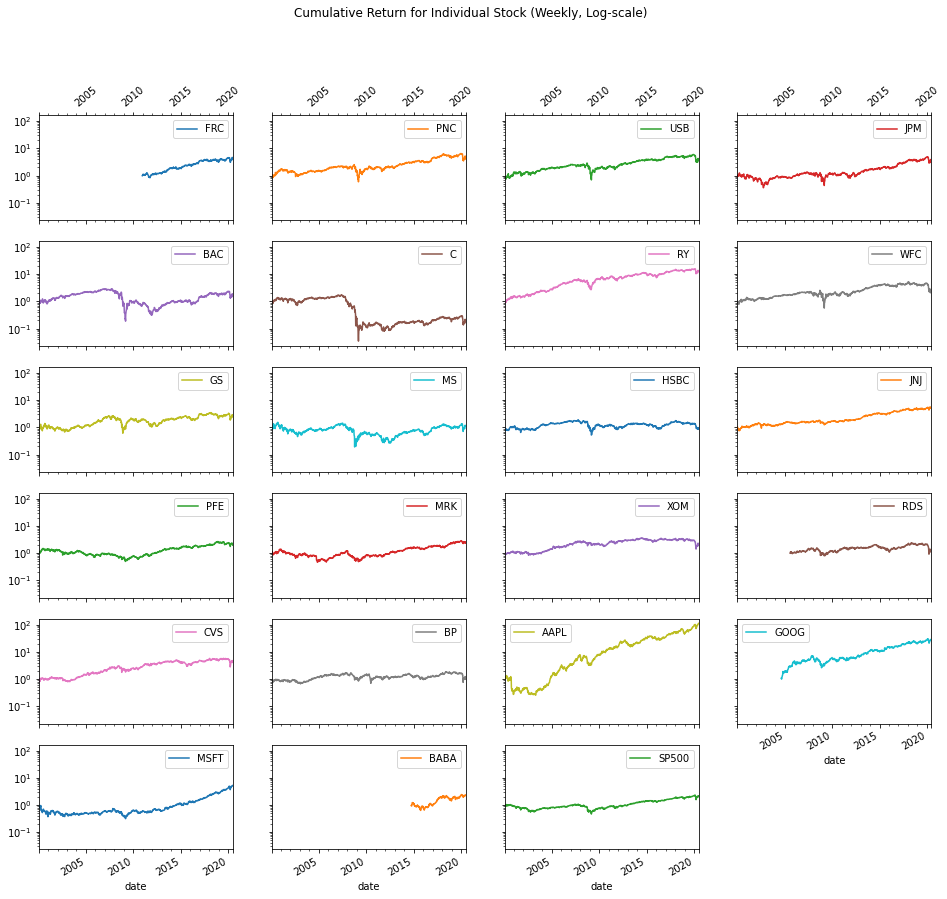

In [45]:
# Plot cumulative return for each firm
lo_col = 4
lo_row = int(np.ceil(len(df.columns)/4))
f_hei = lo_row * 2.5
f_wid = lo_col * 4
ax = (data+1).cumprod().plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=True, sharex=True, sharey=True,
                             title='Cumulative Return for Individual Stock (Weekly, Log-scale)');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

### Summary Statistics
For each firm, calculate and output the: 
- Total Return
- Average return,
- Annualized Average return, 
- Annualized standard deviation, 
- Annualized Sharpe Ratio,
- Maximum drawdown.

Note: we used the 3-Month T-Bill Return as an indicator for risk-free rate when calculating for Sharpe Ratio. (Data Source: https://fred.stlouisfed.org/series/WTB3MS).

In [46]:
GAF.getSumStat(data)

Summary Statistic Information from 01/03/2000 to 06/28/2020:
Dropping firms: 
FRC
RDS
GOOG
BABA


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
PNC,Bank,311.54,0.25,14.05,35.74,0.34,-76.64
USB,Bank,260.58,0.23,12.75,34.18,0.32,-76.09
JPM,Bank,224.48,0.24,13.45,37.46,0.31,-71.51
BAC,Bank,56.75,0.24,13.07,46.04,0.25,-93.46
C,Bank,-81.53,0.10,5.61,53.84,0.07,-97.97
RY,Bank,1182.27,0.30,16.61,24.27,0.61,-60.28
WFC,Bank,125.06,0.21,11.28,37.52,0.25,-77.71
GS,Bank,153.40,0.22,11.88,37.01,0.27,-77.20
MS,Bank,12.70,0.24,13.19,49.77,0.23,-87.57
HSBC,Bank,-14.04,0.05,2.78,26.18,0.04,-72.16


Note that some firms have missing data for the whole time period given in the dataset. 

We can change the time period to the starting date of a given firm's data, so that one can examine the Summary Statistics for that particular firm.

In [47]:
firm_name = 'FRC'

In [48]:
# Output the index (or date) of the first datapoint for given firm's returns
data[firm_name].first_valid_index()

Timestamp('2010-12-12 00:00:00')

In [49]:
start_date = '2010-12-12'
end_date   = '2020-06-28'


In [50]:
# Output the summary statistics of the data for the given time period
ind = (data.index >= start_date)*(data.index <= end_date)
display(GAF.getSumStat(data[ind], rf = GAF.df_rf['T-Bill'][ind]))

Summary Statistic Information from 12/06/2010 to 06/28/2020:
Dropping firms: 
BABA


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,299.96,0.34,19.47,25.94,0.72,-33.06
PNC,Bank,123.35,0.23,12.51,26.13,0.45,-46.63
USB,Bank,83.36,0.18,9.65,24.16,0.37,-48.13
JPM,Bank,200.97,0.29,16.23,26.72,0.58,-39.64
BAC,Bank,119.38,0.27,14.75,33.53,0.42,-66.00
C,Bank,22.89,0.16,8.42,34.47,0.23,-53.90
RY,Bank,82.56,0.16,8.62,19.95,0.40,-35.26
WFC,Bank,15.97,0.10,5.29,26.96,0.17,-60.90
GS,Bank,34.27,0.14,7.52,29.02,0.24,-48.89
MS,Bank,116.13,0.26,14.68,33.70,0.42,-58.41


## 2. Graphical Analysis

Below we will introduce a graphical analysis algorithm and apply it on the weekly stock returns data. The algorithm employs several unsupervised learning techniques and combine them together to visualize the stock returns data.

The algorithm takes the weekly returns of the stocks as input, and feeds it into three unsupervised learning techniques in order. The three techniques are:

- ***Sparse Inverse Covariance Estimation*** is used on the returns data, and it outputs a sparse matrix whose elements represent the conditional correlation between any two stock returns.
    - It provides information about which stocks are correlated conditionally on the others, and we can use this information to construct the graphical network.
        - The estimator we used in this graphical analysis example is called **Graphical Lasso**, which uses an l1 penalty to enforce sparsity on the precision matrix.
- ***Affinity Propagation***, like K-Means, is a clustering method that organizes the returns into clusters. It does not enforce equal-size clusters, and it can choose automatically the number of clusters from the data.
    - Stock returns that are clustered together can be considered as having a similar impact at the level of the full stock market.
- ***Manifold Learning*** is a non-linear embedding method that projects a high-dimensional graph onto 2D plane. The 2D graph is then constructed by combining the results from the above techniques in the following way:
    - Each node corresponds to a stock, with color being defined by the cluster label from Affinity Propagation.
    - Each edge links two stocks. 
        - The **strength** of the edge is defined by the sparse inverse covariance matrix (i.e. the precision matrix). The higher the value is, the more conditional correlated it is for the two stocks.
    - The Maniford 2D embedding is used to position the nodes on the plane.
        - The Manifold learning method we used in this graphical analysis example is called **Multidimensional scaling (MDS)**, which seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space

The source code is wrapped up in Graphical_Analysis_functions.py, and is beyond the scope of the course. Interested readers can find more information and read about the above three techniques.

References: 
- https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
- https://scikit-learn.org/stable/modules/covariance.html#sparse-inverse-covariance
- https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation
- https://scikit-learn.org/stable/modules/manifold.html#multi-dimensional-scaling-mds

Recall that the sectors available in this dataset are:

## #Data_Preprocessing

Specifications:
- Enter some specific dates in the "**start_date**" and "**end_date**" to specify the start and end date.
- By default ( i.e. **Sectors_chosen** = [] ), ALL sectors will be included in the graphical analysis.
    - if certain sectors are entered in the "**Sectors_chosen**" option, then only those sectors will be examined in the graphical network analysis.
    - e.g: Sectors_chosen = ['Bank','Tech']
        - Only the Bank and Tech sectors will be examined.
- By default ( i.e. **drop_firm** = [] ), ALL firms in the given sectors (specified in "**Sectors_chosen**") will be included in the graphical analysis.
    - if certain firms are entered in the "**drop_firm**" option, then only those firms will NOT be examined in the graphical network analysis.
    - e.g: drop_firm = ['FRC','RY']
        - 'FRC' and 'RY' will not be examined.
- By default (i.e. **display_SumStat** = True, **display_IndRet** = True), the summary statisitcs and the individual firm performance (individual firm's cumulative returns) will be displayed

In [51]:

## Start and End date we are considering:
start_date = '2020-01-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = []

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True

Results over the time period  2020-01-01  to  2020-06-28 :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Number of firms examined: 22
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL, GOOG, MSFT
Cluster 5: BABA


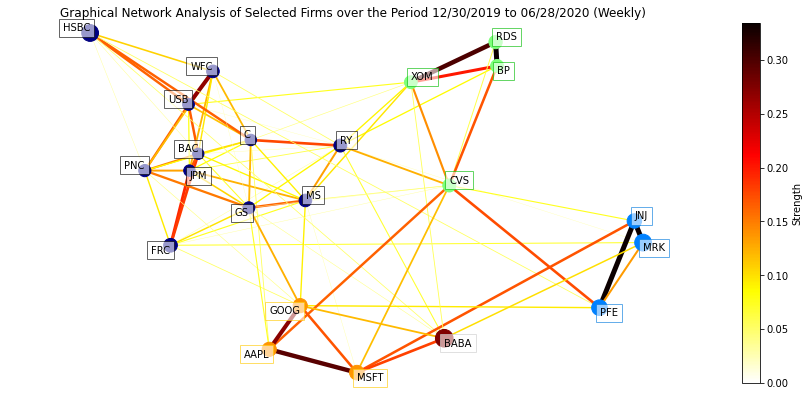

Individual Stock Performance over the Period 12/30/2019 to 06/28/2020 (Weekly):


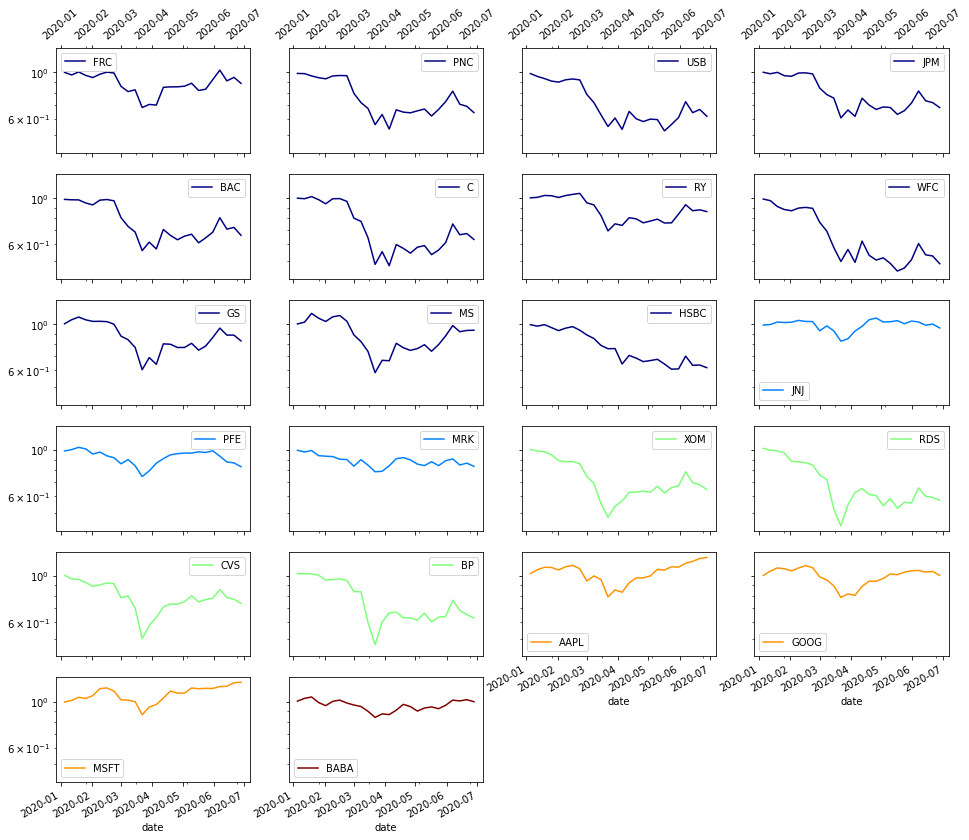

Summary Statistic Information from 12/30/2019 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,-11.45,-0.16,-8.11,57.39,-0.15,-32.56
PNC,Bank,-35.98,-1.27,-48.68,67.95,-0.74,-45.96
USB,Bank,-38.49,-1.44,-52.93,67.65,-0.80,-46.95
JPM,Bank,-32.30,-1.13,-44.75,62.17,-0.74,-39.64
BAC,Bank,-33.63,-1.14,-44.79,68.50,-0.67,-43.26
C,Bank,-36.64,-1.09,-43.39,83.90,-0.53,-53.47
RY,Bank,-13.72,-0.38,-17.95,44.40,-0.42,-34.02
WFC,Bank,-51.54,-2.22,-68.89,76.84,-0.92,-54.91
GS,Bank,-16.94,-0.32,-15.13,65.86,-0.24,-44.17
MS,Bank,-6.51,0.15,8.25,66.58,0.12,-48.07


In [52]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()

# Output the Clustering information, graphical network plot, 
# as well as summary statistics (optional) and the individual firm performance (optional)
# Store the correlation matrix and precision matrix in "est" (stands for estimates)
# Store the plotting configuration information in "con_fig" which will be needed if we want to use the ZOOM functions
## Note: you can view the correlation matrix by looking at est[0] and view the precision matrix by looking at est[1] 
est, con_fig = GAF.graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

In [53]:
Sectors_list = ['Bank']

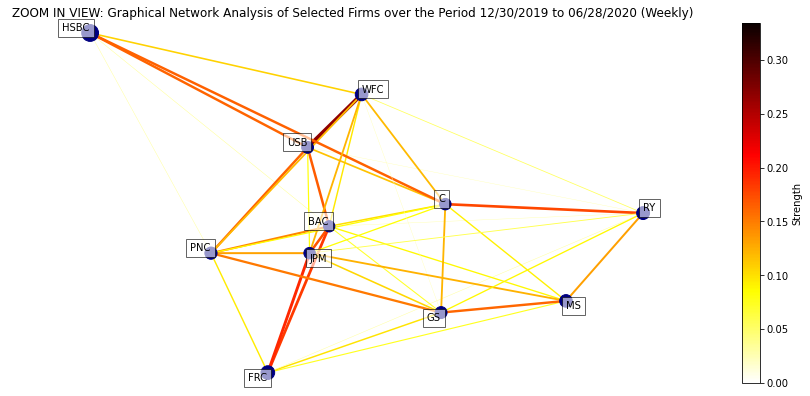

In [54]:
GAF.graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [55]:

firms_list = ['FRC','JPM','BAC', 'GS', 'MS', 'PNC','C']

ZOOM IN View of the Selected Firms:
['FRC', 'JPM', 'BAC', 'GS', 'MS', 'PNC', 'C']


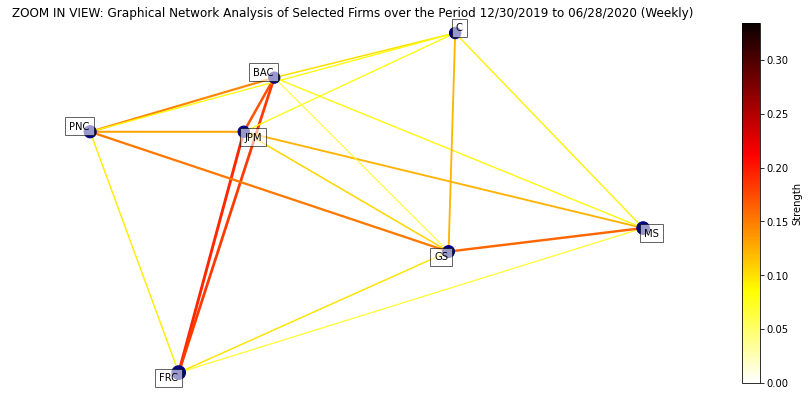

In [56]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
GAF.graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

### Second Data Analysis

Recall:

Specifications:
- Enter some specific dates in the "**start_date**" and "**end_date**" to specify the start and end date.
- By default ( i.e. **Sectors_chosen** = [] ), ALL sectors will be included in the graphical analysis.
    - if certain sectors are entered in the "**Sectors_chosen**" option, then only those sectors will be examined in the graphical network analysis.
    - e.g: Sectors_chosen = ['Bank','Tech']
        - Only the Bank and Tech sectors will be examined.
- By default ( i.e. **drop_firm** = [] ), ALL firms in the given sectors (specified in "**Sectors_chosen**") will be included in the graphical analysis.
    - if certain firms are entered in the "**drop_firm**" option, then only those firms will NOT be examined in the graphical network analysis.
    - e.g: drop_firm = ['FRC','RY']
        - 'FRC' and 'RY' will not be examined.
- By default (i.e. **display_SumStat** = True, **display_IndRet** = True), the summary statisitcs and the individual firm performance (individual firm's cumulative returns) will be displayed

In [57]:
## Start and End date we are considering:
start_date = '2015-07-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = []

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True


Results over the time period  2015-07-01  to  2020-06-28 :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Number of firms examined: 22
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL, GOOG, MSFT
Cluster 5: BABA


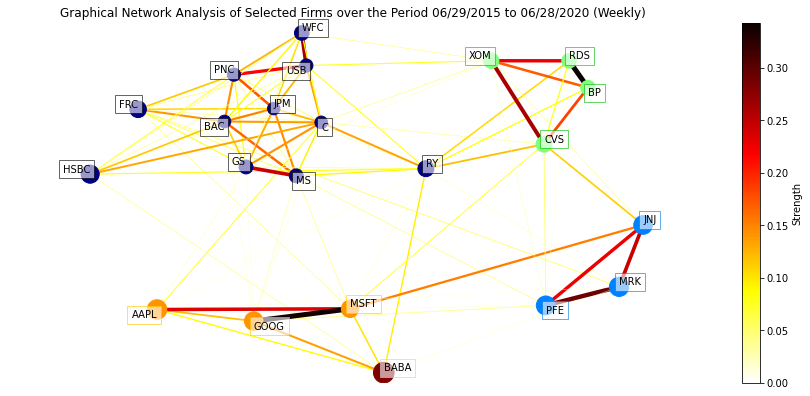

Individual Stock Performance over the Period 06/29/2015 to 06/28/2020 (Weekly):


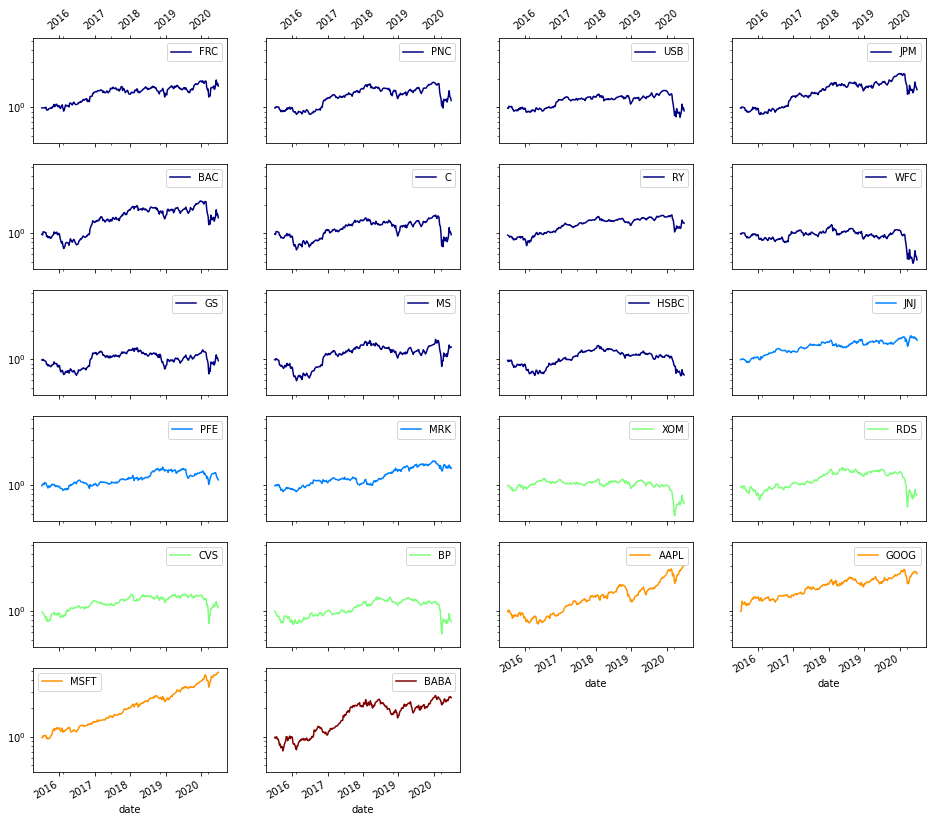

Summary Statistic Information from 06/29/2015 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,67.82,0.28,15.53,28.84,0.50,-32.56
PNC,Bank,17.99,0.15,7.95,29.49,0.23,-46.63
USB,Bank,-8.02,0.04,2.12,27.53,0.04,-48.13
JPM,Bank,53.80,0.24,13.29,27.99,0.43,-39.64
BAC,Bank,45.63,0.25,13.99,33.62,0.38,-43.98
C,Bank,-3.41,0.11,5.84,35.61,0.13,-53.47
RY,Bank,27.91,0.14,7.31,20.63,0.30,-34.02
WFC,Bank,-47.63,-0.15,-7.47,32.16,-0.26,-60.90
GS,Bank,-3.73,0.08,4.29,31.69,0.10,-46.94
MS,Bank,33.91,0.22,11.85,32.89,0.32,-48.07


In [58]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()
est, con_fig = GAF.graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

In [59]:
Sectors_list = ['Bank']


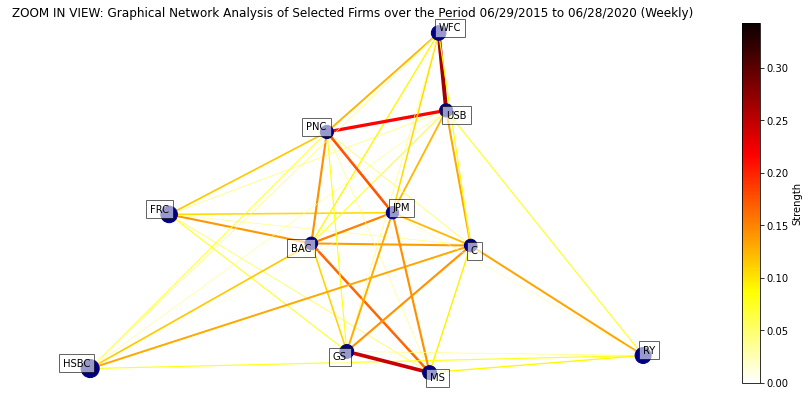

In [60]:
GAF.graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [61]:
firms_list = ['FRC','PNC','USB','BAC', 'GS','JPM','C','MS']

ZOOM IN View of the Selected Firms:
['FRC', 'PNC', 'USB', 'BAC', 'GS', 'JPM', 'C', 'MS']


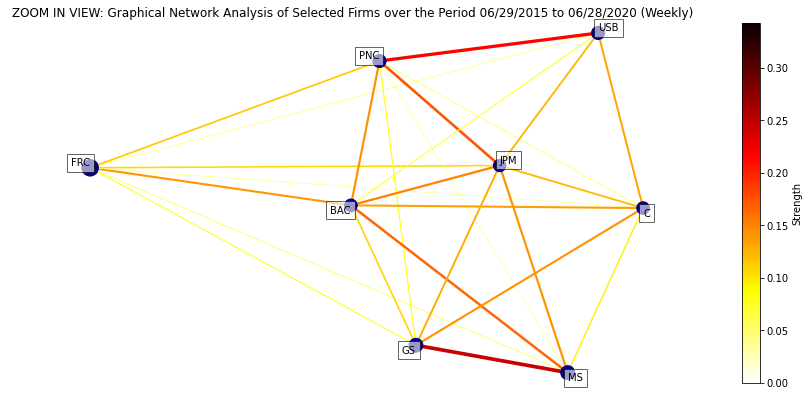

In [62]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
GAF.graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

### Single Stock Analysis: Focusing on a particular firm

Note that some firms have missing data for the whole time period given in the dataset. 

We can change the time period to the starting date of a given firm's data, so that one can examine the graphical analysis results for that particular firm.

In [63]:
firm_name = 'FRC'

In [64]:
data[firm_name].first_valid_index()

Timestamp('2010-12-12 00:00:00')

In [65]:
start_date = '2010-12-12'
end_date   = '2020-06-28'


Sectors_chosen = ['Bank','Health','Energy','Tech']
drop_firm = []


display_SumStat = True
display_IndRet = True

Graphical analysis results over the time period  2010-12-12  to  2020-06-28  for  FRC :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Dropping firms: 
BABA

Number of firms examined: 21
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL
Cluster 5: GOOG, MSFT


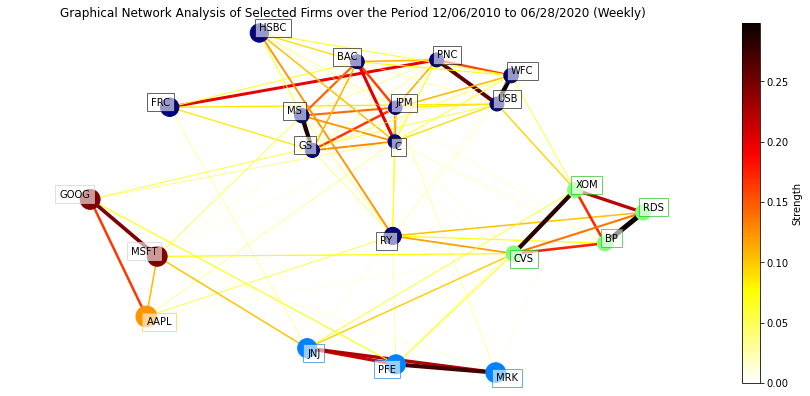

Individual Stock Performance over the Period 12/06/2010 to 06/28/2020 (Weekly):


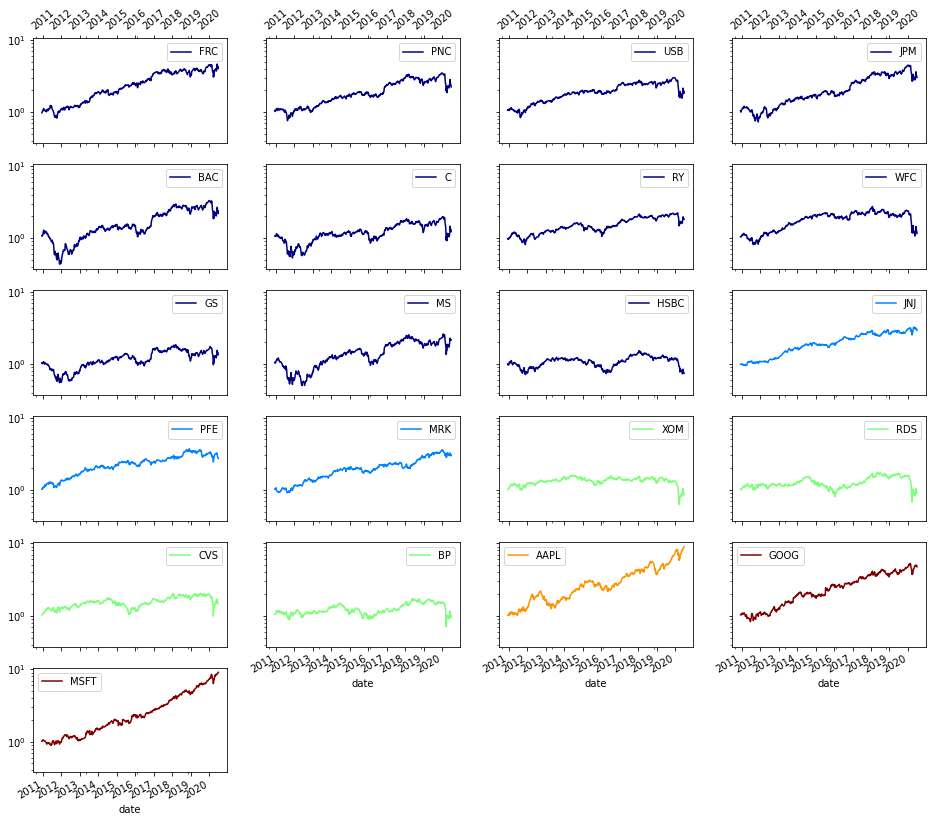

Summary Statistic Information from 12/06/2010 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,299.96,0.34,19.47,25.94,0.72,-33.06
PNC,Bank,123.35,0.23,12.51,26.13,0.45,-46.63
USB,Bank,83.36,0.18,9.65,24.16,0.37,-48.13
JPM,Bank,200.97,0.29,16.23,26.72,0.58,-39.64
BAC,Bank,119.38,0.27,14.75,33.53,0.42,-66.00
C,Bank,22.89,0.16,8.42,34.47,0.23,-53.90
RY,Bank,82.56,0.16,8.62,19.95,0.40,-35.26
WFC,Bank,15.97,0.10,5.29,26.96,0.17,-60.90
GS,Bank,34.27,0.14,7.52,29.02,0.24,-48.89
MS,Bank,116.13,0.26,14.68,33.70,0.42,-58.41


In [66]:
print('Graphical analysis results over the time period ', start_date, ' to ', end_date, ' for ', firm_name, ':')
print()
est, con_fig = GAF.graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

In [67]:
Sectors_list = ['Bank']

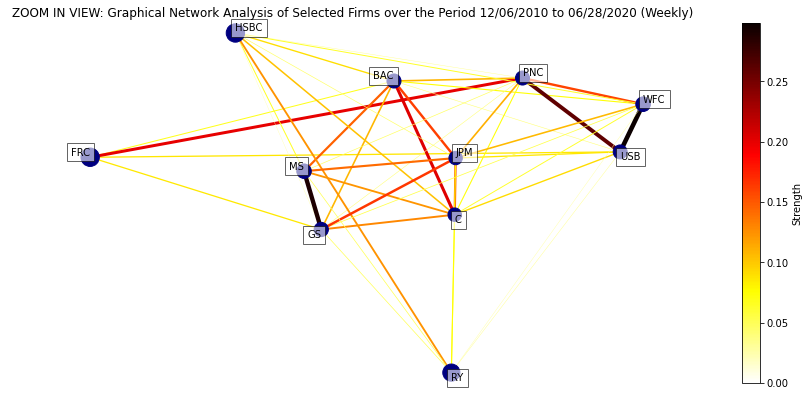

In [68]:
GAF.graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [69]:
firms_list = ['FRC','PNC', 'USB', 'BAC', 'GS']

ZOOM IN View of the Selected Firms:
['FRC', 'PNC', 'USB', 'BAC', 'GS']


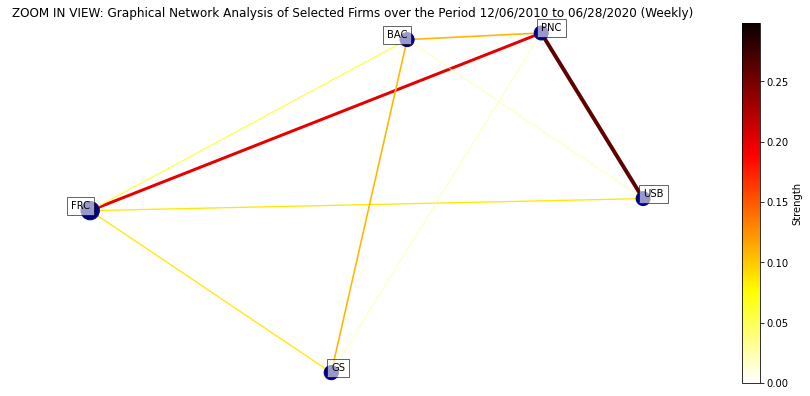

In [70]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
GAF.graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)